# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [3]:
# Your code here
import numpy as np

# Explore the dataset
train_shape = x_train.shape
test_shape = x_test.shape
image_dimensions = x_train[0].shape
num_classes = len(np.unique(y_train))

# Display the details of the dataset
dataset_details = {
    "Training Set Shape": train_shape,
    "Test Set Shape": test_shape,
    "Image Dimensions": image_dimensions,
    "Number of Classes": num_classes,
}

print(dataset_details)

{'Training Set Shape': (50000, 32, 32, 3), 'Test Set Shape': (10000, 32, 32, 3), 'Image Dimensions': (32, 32, 3), 'Number of Classes': 100}


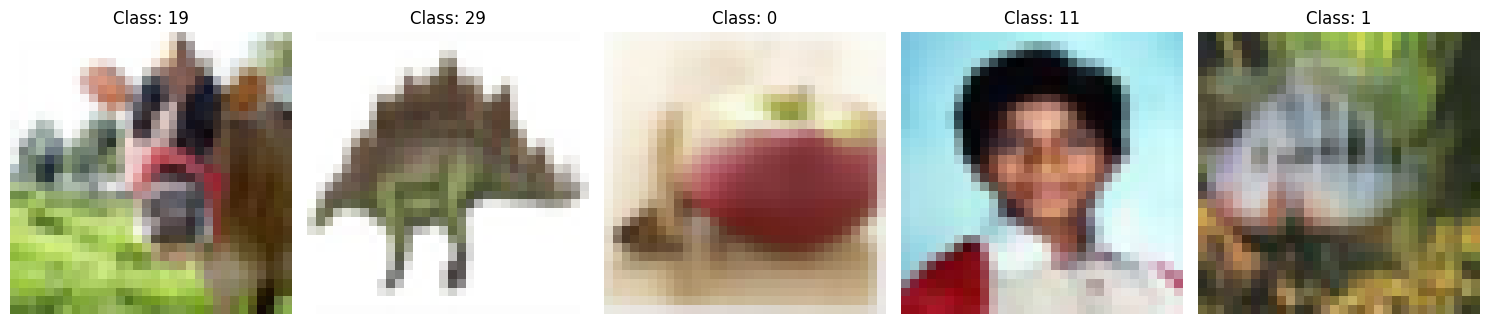

In [4]:
import matplotlib.pyplot as plt
# Show a few examples from the training set
num_examples = 5
fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))
for i in range(num_examples):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
    axes[i].set_title(f"Class: {y_train[i][0]}")
plt.tight_layout()
plt.show()


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your code here
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


# Normalize the images to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoded vectors
# One-hot encode the labels
n_classes = 100
y_train_one_hot = to_categorical(y_train,n_classes )
y_test_one_hot = to_categorical(y_test, n_classes)

# Split the training set into training and validation sets (80% training, 20% validation)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

In [6]:
# Display shapes of the resulting datasets
dataset_splits = {
    "Training Set Shape (Images)": x_train_final.shape,
    "Training Set Shape (Labels)": y_train_final.shape,
    "Validation Set Shape (Images)": x_val.shape,
    "Validation Set Shape (Labels)": y_val.shape,
    "Test Set Shape (Images)": x_test.shape,
    "Test Set Shape (Labels)": y_test.shape,
}

dataset_splits

{'Training Set Shape (Images)': (40000, 32, 32, 3),
 'Training Set Shape (Labels)': (40000, 100),
 'Validation Set Shape (Images)': (10000, 32, 32, 3),
 'Validation Set Shape (Labels)': (10000, 100),
 'Test Set Shape (Images)': (10000, 32, 32, 3),
 'Test Set Shape (Labels)': (10000, 1)}

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Your code here

# Define the baseline CNN model
def create_baseline_cnn(input_shape, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='valid',input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Parameters for the model
input_shape = x_train.shape[1:]  # Shape of the input images
num_classes = 100  # CIFAR-100 has 100 classes

# Create the model
baseline_model = create_baseline_cnn(input_shape, num_classes)

# Print the model summary
baseline_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 434,212 (1.66 MB)

 Trainable params: 434,212 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Since CIFAR-100 is a multi-class problem crossentropy is a right choice for it. It measures the dissimilarities between true label dist vs sofmax probabilities.
- <b>Optimizer:</b> I select the ADAM optimizer due to efficient handling on sparse gradients. with right learning rate it can get a faster convergence.

In [33]:
from keras import optimizers

# Your code here

# Compile the model with the chosen loss function and optimizer - I choose the Adam optimizer
baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [34]:
# Your code here

# Training parameters
epochs = 20  # I have selected 10 because once I tried 20 the accuracy was not improving after the Epoch 10.
batch_size = 32  # Standard batch size

# Train the model
history = baseline_model.fit(
    x_train_final,
    y_train_final,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

# Save training history for analysis
history_dict = {
    "loss": history.history["loss"],
    "val_loss": history.history["val_loss"],
    "accuracy": history.history["accuracy"],
    "val_accuracy": history.history["val_accuracy"],
}


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0369 - loss: 4.3575 - val_accuracy: 0.1325 - val_loss: 3.6655
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1619 - loss: 3.5095 - val_accuracy: 0.2084 - val_loss: 3.2771
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2492 - loss: 3.0168 - val_accuracy: 0.2660 - val_loss: 2.9799
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3042 - loss: 2.7144 - val_accuracy: 0.2957 - val_loss: 2.8305
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3646 - loss: 2.4359 - val_accuracy: 0.3180 - val_loss: 2.7109
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4071 - loss: 2.2415 - val_accuracy: 0.3344 - val_loss: 2.6697
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4496 - loss: 2.0433 - val_accuracy: 0.3376 - val_loss: 2.7483
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4909 - loss: 1.8640 - 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.8379
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> The F1-score combines precision and recall into a single metric,
- <b>Value of metric:</b> : 0.3219
- <b>Interpretation of metric value:</b> F1 score is a harmonic mean of precision and recall

In [35]:
# Your code here
# Predict on the test set
from sklearn.metrics import f1_score
y_pred = baseline_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate the F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')  # Macro-average for multi-class
print(f"F1-Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1-Score: 0.3360


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

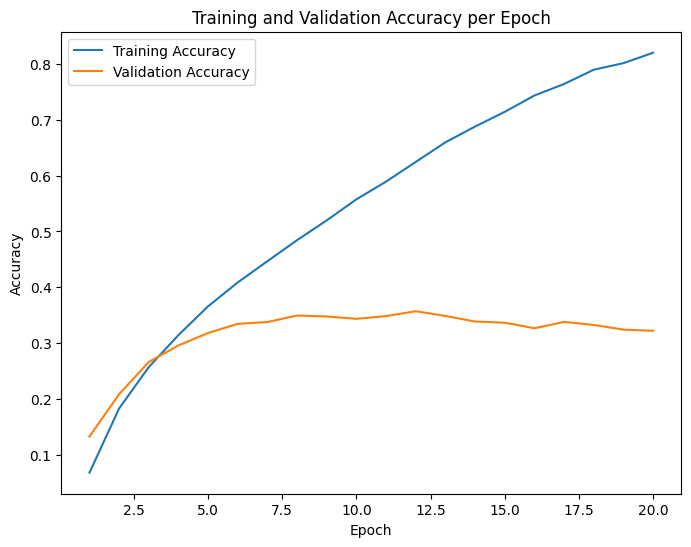

In [36]:
# Your code here

# Access training and validation accuracies
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
epochs_range = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.show()




We can clearly see in this plot that the validation accuracy is declining while the training accuracy is increasing, which is an indicator of overfitting.

In [38]:
# Select a correctly classified and incorrectly classified image
# Replace this with predictions from your trained model

# Replace 'model' with the variable name of your trained model
y_pred_probs = baseline_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
# Indices where predictions are incorrect
incorrect_indices = np.where(y_pred_classes != y_test)[0]

# Indices where predictions are correct
correct_indices = np.where(y_pred_classes == y_test)[0]


In [40]:
# CIFAR-100 fine label names
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee',
    'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
    'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee',
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl',
    'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard',
    'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
    'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]

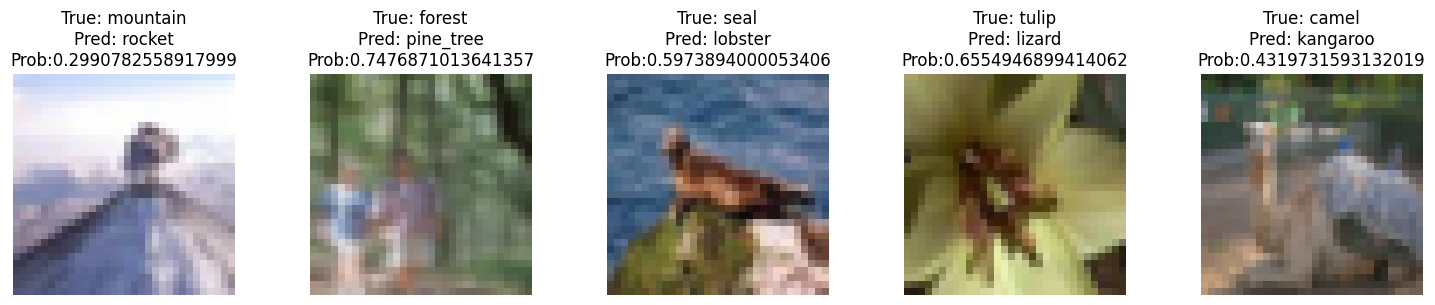

In [41]:
num_samples_to_display = 5

# Ensure there are enough incorrect samples
num_samples = min(num_samples_to_display, len(incorrect_indices))

num_samples_to_display = 5

# Ensure there are enough incorrect samples
num_samples = min(num_samples_to_display, len(incorrect_indices))

fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i, idx in enumerate(incorrect_indices[:num_samples]):
    image = x_test[idx]
    true_label = y_test[idx]
    predicted_label = y_pred_classes[idx]
    probs=y_pred_probs[idx].max()
    axes[i].imshow(image)
    axes[i].set_title(f"True: {fine_labels[true_label]}\nPred: {fine_labels[predicted_label]}\nProb:{probs}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


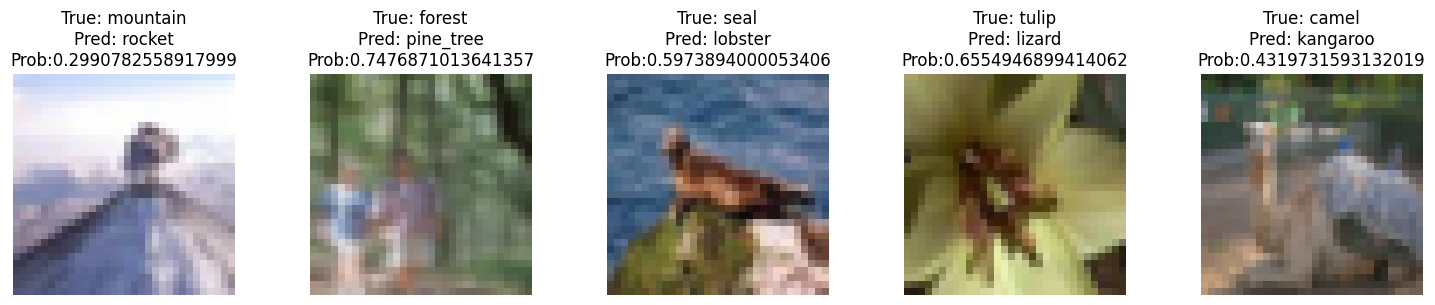

In [42]:
num_samples_to_display = 5

# Let's look atht the correct;y classified images
num_samples = min(num_samples_to_display, len(correct_indices))

num_samples_to_display = 5

# Ensure there are enough correct samples
num_samples = min(num_samples_to_display, len(correct_indices))

fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i, idx in enumerate(incorrect_indices[:num_samples]):
    image = x_test[idx]
    true_label = y_test[idx]
    predicted_label = y_pred_classes[idx]
    probs=y_pred_probs[idx].max()
    axes[i].imshow(image)
    axes[i].set_title(f"True: {fine_labels[true_label]}\nPred: {fine_labels[predicted_label]}\nProb:{probs}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

From the results above, we can see that the images were misclassified, but their features are similar to each other. Some of the probabilities were quite low, indicating that the model wasn't confident in its decisions. Adding more layers and incorporating dropout may improve the model's performance.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

I plan to enhance the model by introducing dropout layers between the convolutional layers and in the dense layers. This will increase randomness during training, potentially reducing overfitting and improving generalization. Additionally, I will add another dense layer in the output section to strengthen the decision-making process, ensuring it matches the robustness of the convolutional feature extraction.

In [19]:
# Define the new  CNN model
def create_cnn(input_shape, num_classes):
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', padding='valid',input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))  # Regularization

    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))  # Regularization
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Parameters for the model
input_shape = x_train.shape[1:]  # Shape of the input images
num_classes = 100  # CIFAR-100 has 100 classes

# Create the model
new_model = create_cnn(input_shape, num_classes)

# Print the model summary
new_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 434,212 (1.66 MB)

 Trainable params: 434,212 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Your code here

# Compile the model with the chosen loss function and optimizer
new_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
# 8. Train the Model
epochs = 20  # I have selected 10 because once I tried 20 the accuracy was not improving after the Epoch 10.
batch_size = 32  # Standard batch size

# Train the model
history = new_model.fit(
    x_train_final,
    y_train_final,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

# Save training history for analysis
history_dict = {
    "loss": history.history["loss"],
    "val_loss": history.history["val_loss"],
    "accuracy": history.history["accuracy"],
    "val_accuracy": history.history["val_accuracy"],
}




Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0298 - loss: 4.3916 - val_accuracy: 0.1117 - val_loss: 3.7536
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1319 - loss: 3.6504 - val_accuracy: 0.1836 - val_loss: 3.3256
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1998 - loss: 3.2863 - val_accuracy: 0.2261 - val_loss: 3.1212
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2455 - loss: 3.0392 - val_accuracy: 0.2643 - val_loss: 2.9352
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2789 - loss: 2.8560 - val_accuracy: 0.2895 - val_loss: 2.8066
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3067 - loss: 2.7173 - val_accuracy: 0.3060 - val_loss: 2.7805
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3322 - loss: 2.5956 - val_accuracy: 0.3142 - val_loss: 2.7267
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3516 - loss: 2.4799 - 

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

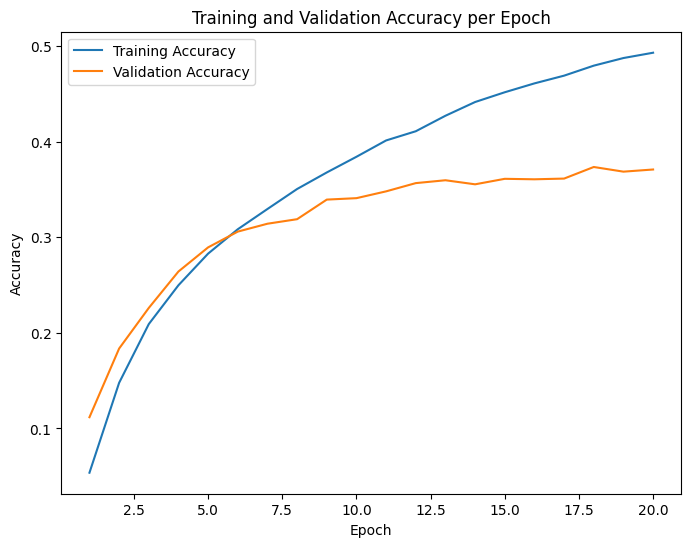

In [22]:

# Access training and validation accuracies
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']
epochs_range = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.show()

In this diagram, we observe that while the training accuracy decreases slightly, the gap between the training and validation accuracies narrows significantly. This indicates that adding randomness through the dropout layer effectively mitigates overfitting, leading to better generalization on the validation data.

In [23]:
# Your code here
# Predict on the test set
from sklearn.metrics import f1_score
y_pred = new_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate the F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')  # Macro-average for multi-class
print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1-Score: 0.3747


F1 score also increases so that means our precision and recall values also increase.

In [24]:
y_pred_probs = new_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
# Indices where predictions are incorrect
incorrect_indices= np.where(y_pred_classes != y_test)[0]

# Indices where predictions are correct
correct_indices= np.where(y_pred_classes == y_test)[0]

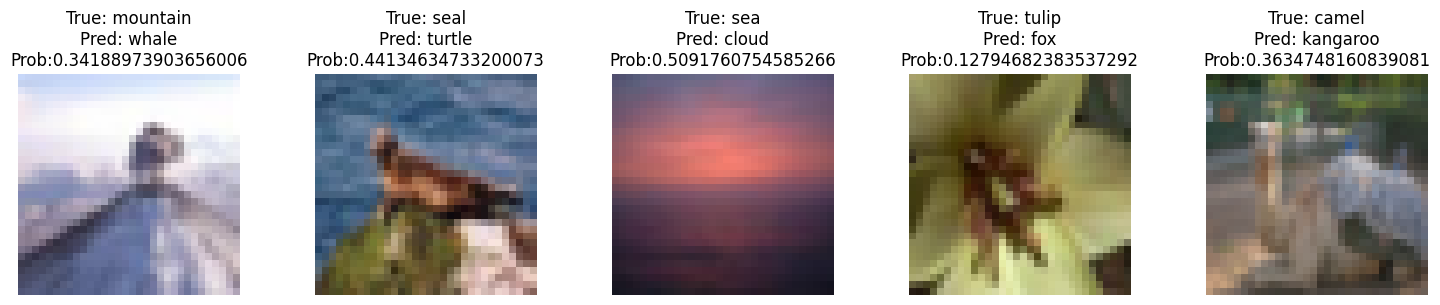

In [29]:
num_samples_to_display = 5

# Ensure there are enough incorrect samples
num_samples = min(num_samples_to_display, len(incorrect_indices))

fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i, idx in enumerate(incorrect_indices[:num_samples]):
    image = x_test[idx]
    true_label = y_test[idx]
    predicted_label = y_pred_classes[idx]
    probs=y_pred_probs[idx].max()
    axes[i].imshow(image)
    axes[i].set_title(f"True: {fine_labels[true_label]}\nPred: {fine_labels[predicted_label]}\nProb:{probs}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

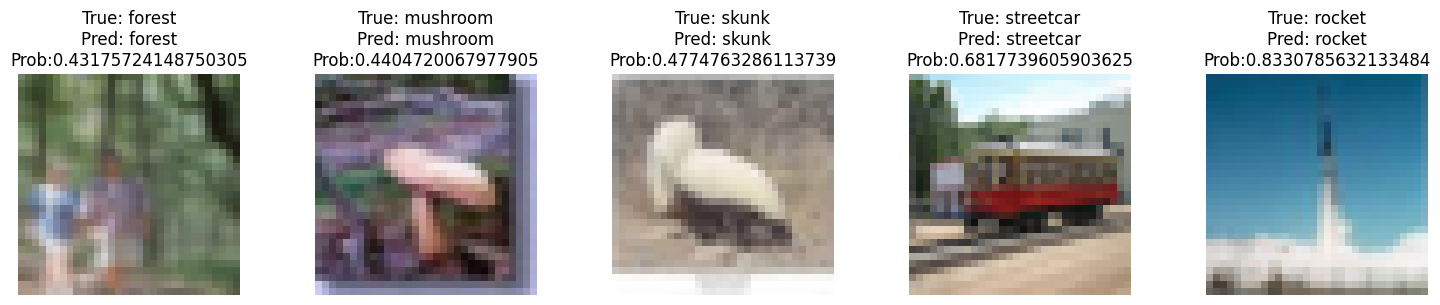

In [31]:
# Now let's look at the correct indices
num_samples = min(num_samples_to_display, len(correct_indices))

fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

for i, idx in enumerate(correct_indices[:num_samples]):
    image = x_test[idx]
    true_label = y_test[idx]
    predicted_label = y_pred_classes[idx]
    probs=y_pred_probs[idx].max()
    axes[i].imshow(image)
    axes[i].set_title(f"True: {fine_labels[true_label]}\nPred: {fine_labels[predicted_label]}\nProb:{probs}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here


The model's training performance remains steady, but the validation accuracy improves, indicating that the adjustments effectively addressed the overfitting issue observed in the previous model. To further enhance performance, additional layers could be introduced to improve feature extraction in the convolutional layers and decision-making in the output layer. I also plan to experiment with ResNet to evaluate its impact on the model's performance and explore whether its residual connections can provide further optimization.

The model accuracy is improved a lot wiht the new model, because

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.